In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
import sklearn.metrics as skm
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

## Store the dataset into DataFrame

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

## DataFrame related Information

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Cleaning

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Null Values

In [8]:
(df.isnull().mean())*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

#### **Our** DataFrame is free of NULL values.

### Duplicate Data

In [9]:
df[df.duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


#### No duplicate values found

In [10]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Features like RowNumber, CustomerId have all values unique, which indicates that these features are not important for our model.

In [11]:
df.drop(["RowNumber","CustomerId"], axis=1, inplace=True)

### Correlation Table

In [12]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


#### There is a small but important relation between Age-Exited & Balance-Exited. This shows that these features are important.

### Data Types

In [13]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### Our dataset is a mixture of both categorical and continuous variables

## Exploratory Data Analysis

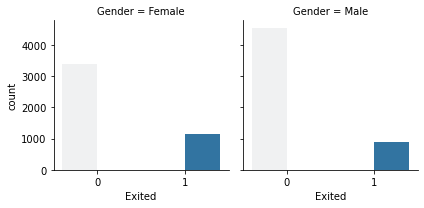

In [14]:
pl = sns.FacetGrid(df, col="Gender")
pl.map(sns.countplot, "Exited", hue=df.Exited)


#### The ratio of the female customers churning is way more than the male customers.

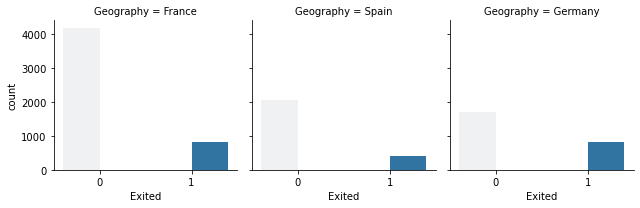

In [15]:
pl = sns.FacetGrid(df, col="Geography")
pl.map(sns.countplot, "Exited", hue=df.Exited)

* Our dataset has most data from the people of France.
* Even though Germany has the lowest percentage of people, the ratio of customers churning is way more than other countries.

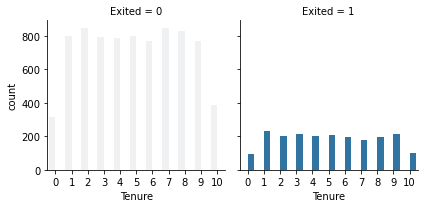

In [16]:
pl = sns.FacetGrid(df, col="Exited")
pl.map(sns.countplot, "Tenure", hue=df.Exited)

#### Most customers who took the Exit had lower tenure, than the ones who had not yet Exited.

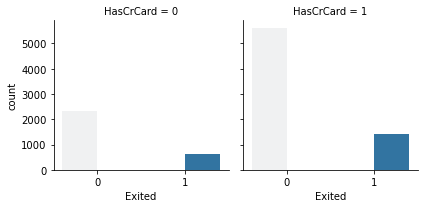

In [17]:
pl = sns.FacetGrid(df, col="HasCrCard")
pl.map(sns.countplot, "Exited", hue=df.Exited)

* There are more customers who have Credit Card
* But, the ones with Credit Card are the ones who have left more often.

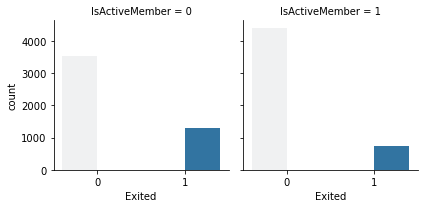

In [18]:
pl = sns.FacetGrid(df, col="IsActiveMember")
pl.map(sns.countplot, "Exited", hue=df.Exited)

#### Customers who are not the active members are the ones who have more exits.

### Outliers

In [19]:
def outliers_plot(data, feature):
    plt.subplots(figsize=(8, 4))
    sns.boxplot(data=data, y = feature, x="Exited")

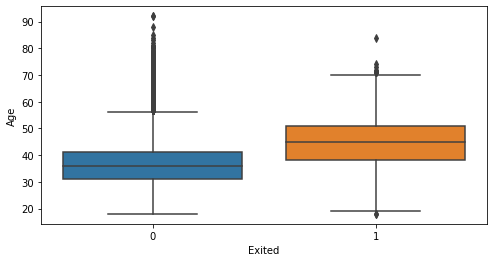

In [20]:
outliers_plot(df,df.Age)

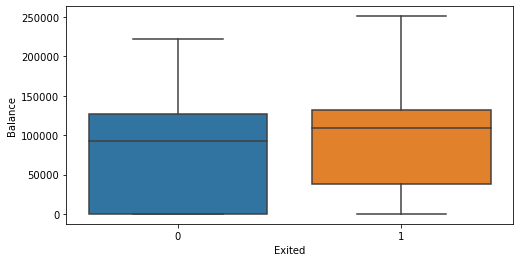

In [21]:
outliers_plot(df,df.Balance)

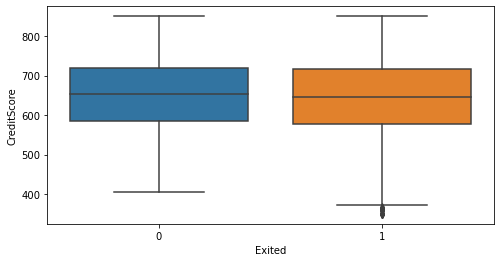

In [22]:
outliers_plot(df,df.CreditScore)

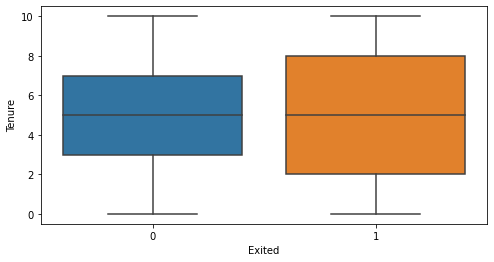

In [23]:
outliers_plot(df,df.Tenure)

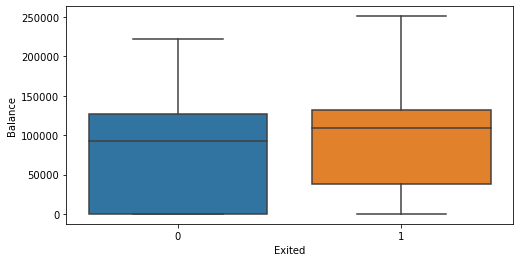

In [24]:
outliers_plot(df,df.Balance)

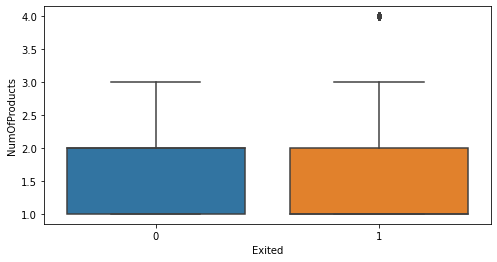

In [25]:
outliers_plot(df,df.NumOfProducts)

### Label Encoding
* Label Encoding all the categorical data

In [26]:
label_encoder_geo = LabelEncoder()
df['Geography'] = label_encoder_geo.fit_transform(df['Geography'])

label_encoder_gen = LabelEncoder()
df['Gender'] = label_encoder_gen.fit_transform(df['Gender'])

### Delete

In [27]:
df.drop("Surname", axis=1,inplace=True)

## Data Splitting

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [29]:
X = df.iloc[:,:-1]
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [30]:
y = df.iloc[:,-1:]
y.columns

Index(['Exited'], dtype='object')

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
[x_train.shape,y_train.shape]

[(7000, 10), (7000, 1)]

In [33]:
[x_test.shape,y_test.shape]

[(3000, 10), (3000, 1)]

## Feature Engineering

In [34]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2228,644,0,0,37,8,0.00,2,1,0,20968.88
5910,481,0,0,39,6,0.00,1,1,1,24677.54
1950,680,0,0,37,10,123806.28,1,1,0,81776.84
2119,690,0,1,29,5,0.00,2,1,0,108577.97
5947,656,0,0,45,7,145933.27,1,1,1,199392.14


In [35]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 2228 to 235
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7000 non-null   int64  
 1   Geography        7000 non-null   int32  
 2   Gender           7000 non-null   int32  
 3   Age              7000 non-null   int64  
 4   Tenure           7000 non-null   int64  
 5   Balance          7000 non-null   float64
 6   NumOfProducts    7000 non-null   int64  
 7   HasCrCard        7000 non-null   int64  
 8   IsActiveMember   7000 non-null   int64  
 9   EstimatedSalary  7000 non-null   float64
dtypes: float64(2), int32(2), int64(6)
memory usage: 546.9 KB


### CreditScorePerAge

In [36]:
x_train["CreditScorePerAge"] = x_train["CreditScore"]/x_train["Age"]

### TenurePerAge

In [37]:
x_train["TenurePerAge"] = x_train["Tenure"]/x_train["Age"]

### NumOfProductsPerAge

In [38]:
x_train["NumOfProductsPerAge"] = x_train["NumOfProducts"]/x_train["Age"]

### BalanceSalary

In [39]:
x_train["BalaneSalary"] = x_train["Balance"]/x_train["EstimatedSalary"]

In [40]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScorePerAge,TenurePerAge,NumOfProductsPerAge,BalaneSalary
2228,644,0,0,37,8,0.00,2,1,0,20968.88,17.405405,0.216216,0.054054,0.000000
5910,481,0,0,39,6,0.00,1,1,1,24677.54,12.333333,0.153846,0.025641,0.000000
1950,680,0,0,37,10,123806.28,1,1,0,81776.84,18.378378,0.270270,0.027027,1.513953
2119,690,0,1,29,5,0.00,2,1,0,108577.97,23.793103,0.172414,0.068966,0.000000
5947,656,0,0,45,7,145933.27,1,1,1,199392.14,14.577778,0.155556,0.022222,0.731891


### Standardization
* Normalizing the continuous data

In [41]:
from sklearn.preprocessing import StandardScaler

sstrain = StandardScaler()

In [42]:
var = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'CreditScorePerAge','TenurePerAge','NumOfProductsPerAge','BalaneSalary']
data = sstrain.fit_transform(x_train[var])

## Feature Selection

### SelectKBest

* The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
* chi-squared (chi²) statistical test for non-negative features to select 12 of the best features.

In [43]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 2228 to 235
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditScore          7000 non-null   int64  
 1   Geography            7000 non-null   int32  
 2   Gender               7000 non-null   int32  
 3   Age                  7000 non-null   int64  
 4   Tenure               7000 non-null   int64  
 5   Balance              7000 non-null   float64
 6   NumOfProducts        7000 non-null   int64  
 7   HasCrCard            7000 non-null   int64  
 8   IsActiveMember       7000 non-null   int64  
 9   EstimatedSalary      7000 non-null   float64
 10  CreditScorePerAge    7000 non-null   float64
 11  TenurePerAge         7000 non-null   float64
 12  NumOfProductsPerAge  7000 non-null   float64
 13  BalaneSalary         7000 non-null   float64
dtypes: float64(6), int32(2), int64(6)
memory usage: 765.6 KB


In [44]:
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
featureScores.nlargest(15,'Score').reset_index(drop= True)

,Features,Score
0,Balance,5.495410e+06
1,EstimatedSalary,6.096528e+03
2,Age,1.465258e+03
3,BalaneSalary,8.825572e+02
4,CreditScorePerAge,6.641636e+02
5,IsActiveMember,8.770417e+01
6,CreditScore,4.923363e+01
7,Gender,4.106994e+01
8,Geography,9.685753e+00
9,TenurePerAge,4.371595e+00


### Heat-Map

<AxesSubplot:>

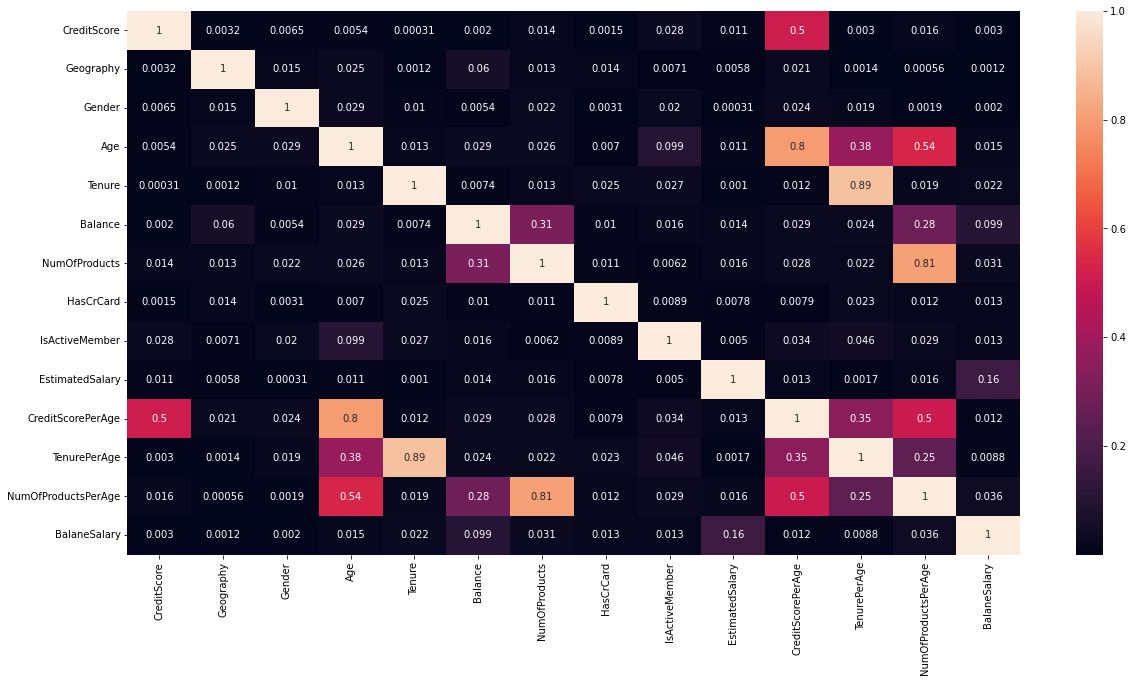

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(x_train.corr().abs(),annot=True)

## Test Data

### Feature Engineering

In [46]:
x_test["CreditScorePerAge"] = x_test["CreditScore"]/x_test["Age"]

In [47]:
x_test["TenurePerAge"] = x_test["Tenure"]/x_test["Age"]

In [48]:
x_test["NumOfProductsPerAge"] = x_test["NumOfProducts"]/x_test["Age"]

In [49]:
x_test["BalaneSalary"] = x_test["Balance"]/x_test["EstimatedSalary"]

## Modeling

#### Now we need to compare with different ML models, and need to find out the best predicted model

* XGBClassifier
* RandomForestClassifier
* LogisticRegression
* CatBoostClassifier

In [50]:
random_grid = {'max_depth': [3,4,5,6,7,8,10], 'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.4], 'subsample':[0,0.5,1], 'n_estimators':[10,20,100,120,140]}

In [51]:
# # xgb_grid = RandomizedSearchCV(XGBClassifier(), random_grid, refit=True) 
# xgb_grid = GridSearchCV(XGBClassifier(), random_grid, refit=True) 
# xgb_grid.fit(x_train,y_train)
# print(xgb_grid.best_score_)    
# print(xgb_grid.best_params_)

In [52]:
# xgb_grid.best_estimator_

In [53]:
# xgb_grid.best_params_

In [54]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=4, min_child_weight=1,
              monotone_constraints='()', n_estimators=140, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGB.fit(x_train, y_train)
y_predicted = XGB.predict(x_train)
print(skm.accuracy_score(y_train, y_predicted))
print(classification_report(y_train,y_predicted,digits=5))

[14:01:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8768571428571429
              precision    recall  f1-score   support

           0    0.88414   0.97335   0.92660      5590
           1    0.82388   0.49433   0.61791      1410

    accuracy                        0.87686      7000
   macro avg    0.85401   0.73384   0.77225      7000
weighted avg    0.87200   0.87686   0.86442      7000



In [55]:
predicted = XGB.predict(x_test)
print(skm.accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted,digits=5))

0.8663333333333333
              precision    recall  f1-score   support

           0    0.87548   0.96882   0.91978      2373
           1    0.80214   0.47847   0.59940       627

    accuracy                        0.86633      3000
   macro avg    0.83881   0.72364   0.75959      3000
weighted avg    0.86015   0.86633   0.85282      3000

